In [1]:
from functions import *
from architectures import *

%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


##     Base: by sku_id

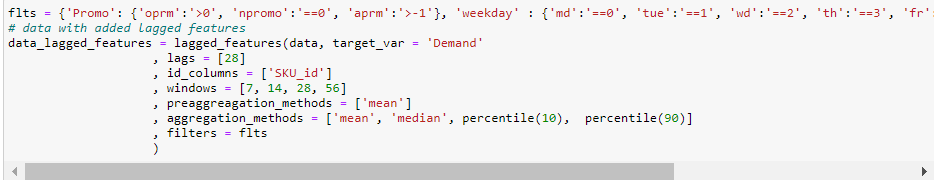

In [2]:
data_lagged_features = pd.read_csv('sku.csv')

In [3]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features)

In [4]:
set_random_seed(7)

In [5]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 390])
Target shape: torch.Size([128])


In [6]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [7]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|███████████████████████████████████████████████████████████████████████| 651/651 [01:07<00:00,  9.65it/s]


Train loss: 0.332591928690443


100%|███████████████████████████████████████████████████████████████████████| 651/651 [00:34<00:00, 18.98it/s]


Smape = 101.33115223446374

Epoch 1
---------


100%|███████████████████████████████████████████████████████████████████████| 651/651 [01:18<00:00,  8.28it/s]


Train loss: 0.2906103754235852


100%|███████████████████████████████████████████████████████████████████████| 651/651 [00:29<00:00, 21.97it/s]


Smape = 90.94527701841064

Epoch 2
---------


100%|███████████████████████████████████████████████████████████████████████| 651/651 [01:07<00:00,  9.65it/s]


Train loss: 0.2907898191894804


100%|███████████████████████████████████████████████████████████████████████| 651/651 [00:29<00:00, 22.32it/s]

Smape = 92.73393867292727



In [8]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|█████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.60it/s]


In [9]:
ans.to_csv('submission_sku.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

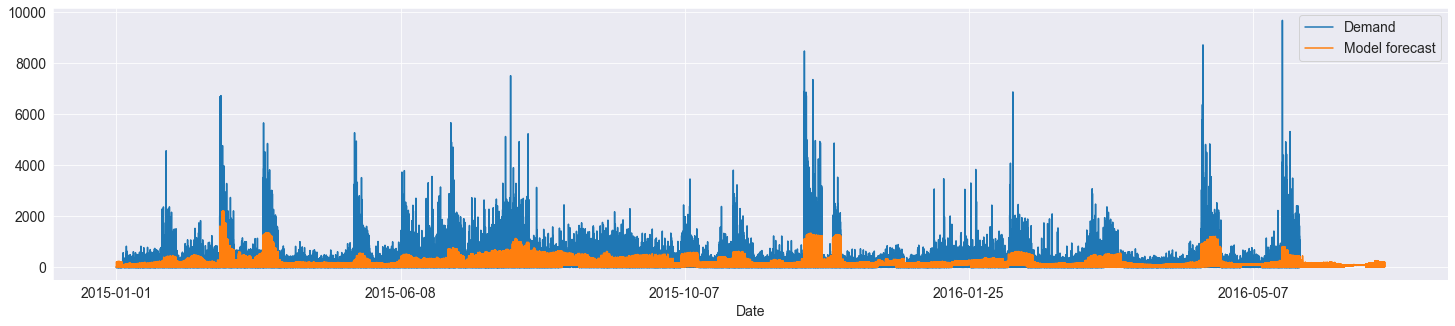

In [10]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

https://www.kaggle.com/c/atsf-fall21-hw3

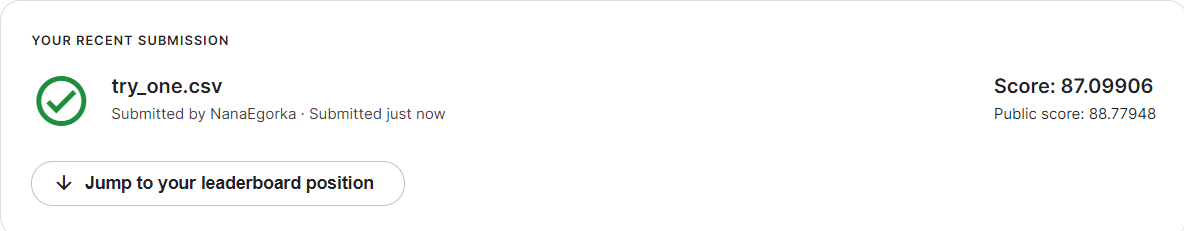

## -----------------------------------------------------------------------------------------------------------------------------

## By ['SKU_id', 'Store_id']

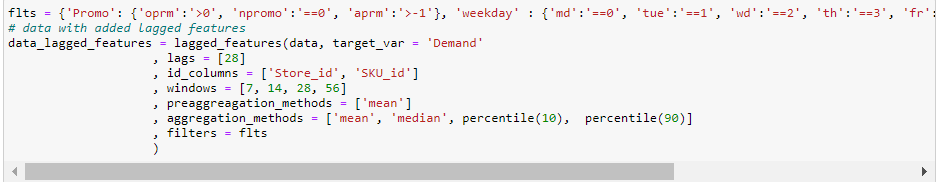

## Method 1

In [11]:
data_lagged_features_sku = pd.read_csv('sku.csv')
data_lagged_features = pd.read_csv('sku_store.csv')

In [12]:
for c in data_lagged_features:
    data_lagged_features.loc[data_lagged_features[c].isna(), c] = data_lagged_features_sku[data_lagged_features[c].isna()][c.replace('Store_id_SKU_id', 'SKU_id')]

In [13]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features)

In [14]:
set_random_seed(7)

In [15]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 390])
Target shape: torch.Size([128])


In [16]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [17]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|███████████████████████████████████████████████████████████████████████| 655/655 [01:05<00:00, 10.06it/s]


Train loss: 0.3152134636658749


100%|███████████████████████████████████████████████████████████████████████| 655/655 [00:29<00:00, 22.09it/s]


Smape = 95.0293574148123

Epoch 1
---------


100%|███████████████████████████████████████████████████████████████████████| 655/655 [01:06<00:00,  9.84it/s]


Train loss: 0.3078634267772427


100%|███████████████████████████████████████████████████████████████████████| 655/655 [00:29<00:00, 22.10it/s]


Smape = 98.87796703627697

Epoch 2
---------


100%|███████████████████████████████████████████████████████████████████████| 655/655 [01:07<00:00,  9.72it/s]


Train loss: 0.3086808608005975


100%|███████████████████████████████████████████████████████████████████████| 655/655 [00:30<00:00, 21.51it/s]

Smape = 98.29480773071788



In [18]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|█████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.14it/s]


In [19]:
ans.to_csv('submission_sku_store.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

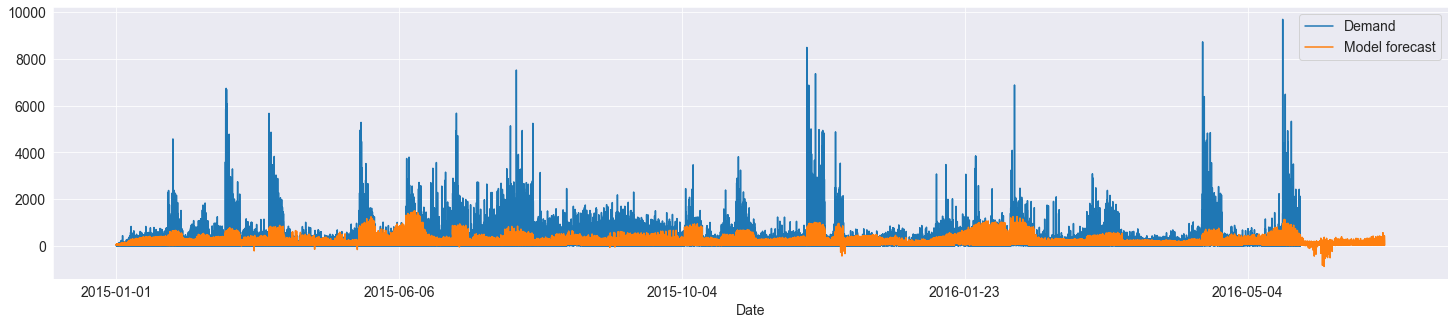

In [20]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

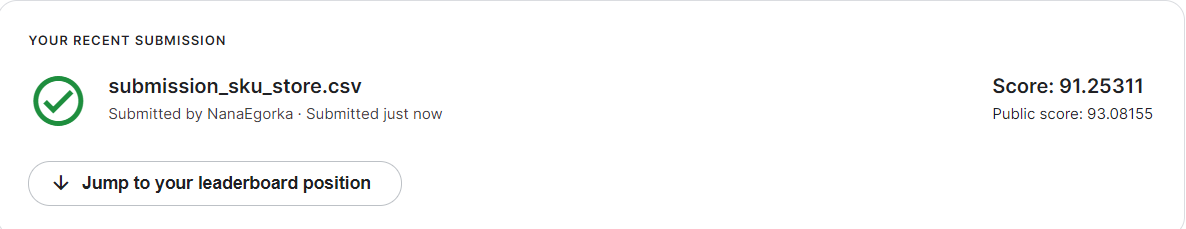

## Method 2

In [21]:
data_lagged_features = pd.read_csv('sku_store.csv')

In [22]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features)

In [23]:
set_random_seed(7)

In [24]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 390])
Target shape: torch.Size([128])


In [25]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [26]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|███████████████████████████████████████████████████████████████████████| 644/644 [01:06<00:00,  9.64it/s]


Train loss: 0.32184970996672324


100%|███████████████████████████████████████████████████████████████████████| 644/644 [00:30<00:00, 21.02it/s]


Smape = 103.65087375958178

Epoch 1
---------


100%|███████████████████████████████████████████████████████████████████████| 644/644 [01:08<00:00,  9.46it/s]


Train loss: 0.27079943125570044


100%|███████████████████████████████████████████████████████████████████████| 644/644 [00:29<00:00, 21.65it/s]


Smape = 111.77260696770324

Epoch 2
---------


100%|███████████████████████████████████████████████████████████████████████| 644/644 [01:07<00:00,  9.51it/s]


Train loss: 0.27094453402002405


100%|███████████████████████████████████████████████████████████████████████| 644/644 [00:29<00:00, 21.52it/s]

Smape = 111.78866849389779



In [27]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|█████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.39it/s]


In [28]:
ans_sku = pd.read_csv('submission_sku.csv')

In [29]:
ans.loc[ans['Demand'].isna(), 'Demand'] = ans_sku[ans.reset_index()['Demand'].isna()]['Demand'].values

In [30]:
ans.to_csv('submission_sku_store2.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

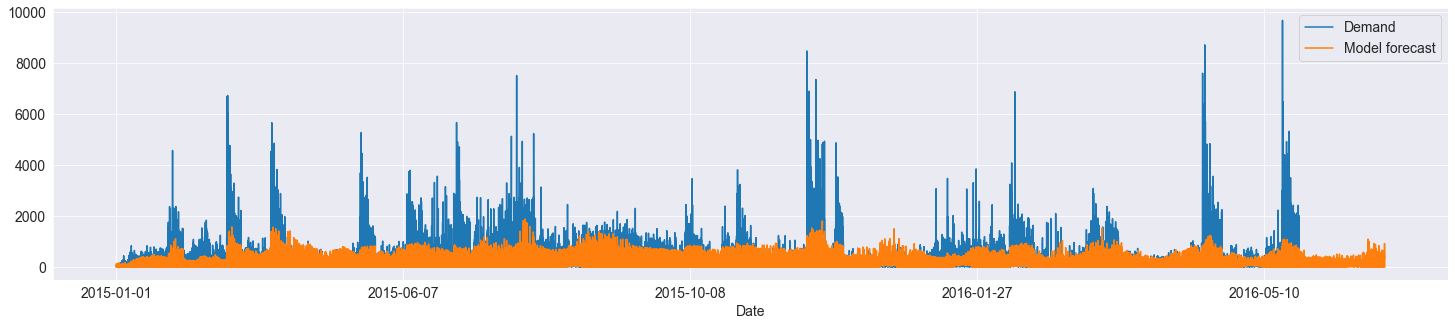

In [31]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

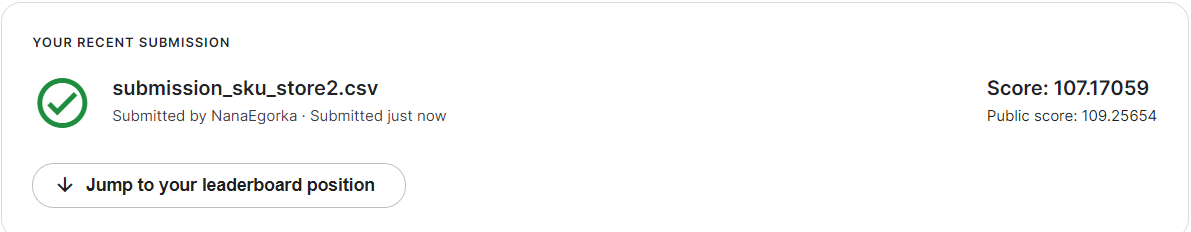

## -----------------------------------------------------------------------------------------------------------------------------

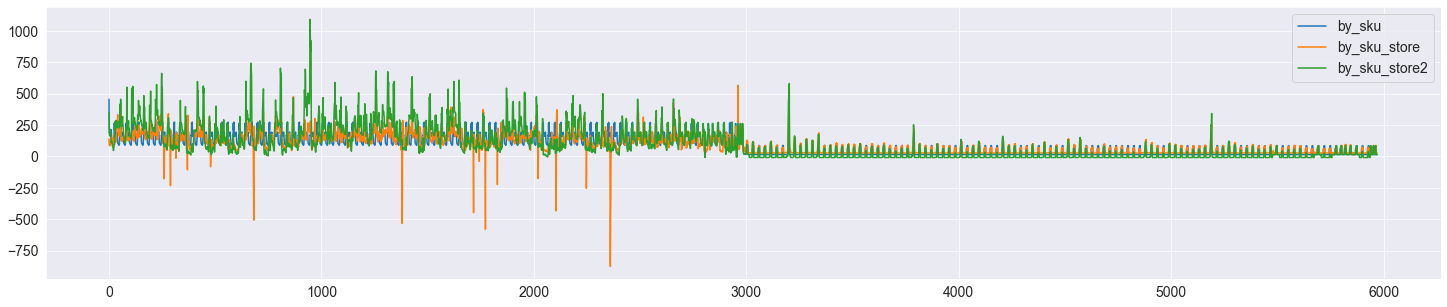

In [3]:
fig = plt.figure()

ans_sku = pd.read_csv('submission_sku.csv')
ans_sku_store = pd.read_csv('submission_sku_store.csv')
ans_sku_store2 = pd.read_csv('submission_sku_store2.csv')

plt.plot(ans_sku['Demand'], label='by_sku')
plt.plot(ans_sku_store['Demand'], label='by_sku_store')
plt.plot(ans_sku_store2['Demand'], label='by_sku_store2')
plt.legend()